In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Reality import Reality
from Organization import Organization

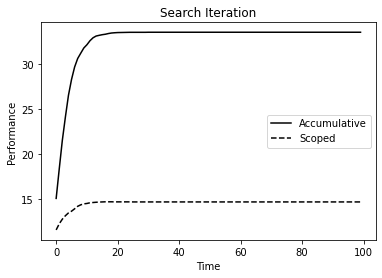

In [3]:
# The performance curve over iteration
# beta = 0; without environment turbulence
n = 280
beta = 0
m = 100
s = 2
lr = 0.3
subgroup_size = 7
reality_change_rate = 0
change_freq = None
loop = 100
reality = Reality(m=m, s=s)
organization = Organization(n=n, beta=beta, subgroup_size=subgroup_size, m=m, s=s, reality=reality,
                            lr=lr, reality_change_rate=reality_change_rate)
organization.form_network()
organization.process(loop=loop, change_freq=change_freq)
x = np.arange(loop)
plt.plot(x, organization.performance_curve, "k-", label='Accumulative')  # zero may learn from others
organization = Organization(n=n, beta=beta, subgroup_size=subgroup_size, m=m, s=s, reality=reality,
                            lr=lr, reality_change_rate=reality_change_rate)
organization.form_network()
organization.process_2(loop=loop, change_freq=change_freq)
plt.plot(x, organization.performance_curve, "k--", label='Scoped')  # zero will not learn from others
# plt.savefig("search.jpg")
plt.title('Search Iteration')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

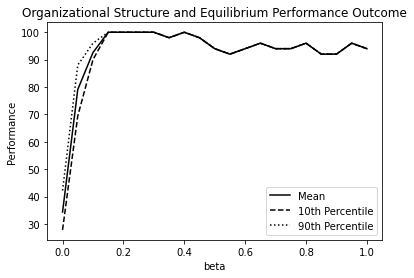

In [6]:
# Simulation parameters
n = 280  # individual number
betas = np.arange(0, 1.05, 0.05)  # rewiring prob (decentralization)
m = 100  # decision dimension
s = 2  # complexity
lr = 0.3  # learning rate
subgroup_size = 7  # group size (z)
reality_change_rate = None # environment turbulence
loop = 100
change_freq = 0
# Basic model, without personnel turnover and environmental turbulence
# Show the impact of centralization
mean_list, ten_list, ninety_list = [], [], []
for beta in betas:
    reality = Reality(m=m, s=s)
    organization = Organization(n=n, beta=beta, subgroup_size=subgroup_size, m=m, s=s, reality=reality,
                                lr=lr, reality_change_rate=reality_change_rate)
    organization.form_network()
    organization.process(loop=loop, change_freq=change_freq)
    mean_list.append(organization.performance_average)
    ten_list.append(np.mean(np.percentile(organization.performance_list, 10)))
    ninety_list.append(np.mean(np.percentile(organization.performance_list, 90)))

x = betas
l1=plt.plot(x, mean_list, 'k-',label='Mean')
l2=plt.plot(x, ten_list, 'k--',label='10th Percentile')
l3=plt.plot(x, ninety_list, 'k:',label='90th Percentile')
plt.title('Organizational Structure and Equilibrium Performance Outcome')
plt.xlabel('beta')
plt.ylabel('Performance')
plt.legend()
# plt.savefig("beta.jpg")
plt.show()

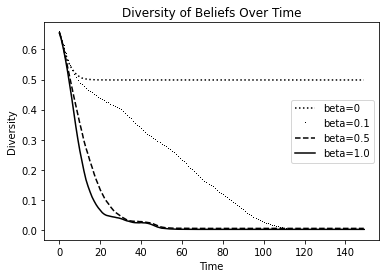

In [2]:
# Figure 3. Diversity
n = 280  # individual number
betas = [0, 0.1, 0.5, 1.0]  # rewiring prob (decentralization)
m = 100  # decision dimension
s = 2  # complexity
lr = 0.3  # learning rate
subgroup_size = 7  # group size (z)
reality_change_rate = None # environment turbulence
loop = 150
change_freq = 0

diversity = []
for beta in betas:
    reality = Reality(m=m, s=s)
    organization = Organization(n=n, beta=beta, subgroup_size=subgroup_size, m=m, s=s, reality=reality,
                                lr=lr, reality_change_rate=reality_change_rate)
    organization.form_network()
    organization.process(loop=loop, change_freq=change_freq)
    diversity.append(organization.diversity_curve)
x = range(loop)
l1=plt.plot(x, diversity[0], 'k:',label='beta=0')
l2=plt.plot(x, diversity[1], 'k,',label='beta=0.1')
l3=plt.plot(x, diversity[2], 'k--',label='beta=0.5')
l4=plt.plot(x, diversity[3], 'k-',label='beta=1.0')
plt.title('Diversity of Beliefs Over Time')
plt.xlabel('Time')
plt.ylabel('Diversity')
plt.legend()
# plt.savefig("diversity.jpg")
plt.show()

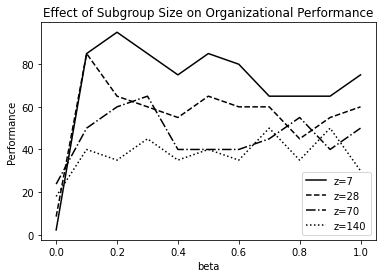

In [5]:
# Subgroup Size Effect
n = 280  # individual number
betas = np.arange(0, 1.1, 0.1)  # rewiring prob (decentralization)
m = 100  # decision dimension
s = 5  # complexity
lr = 0.3  # learning rate
sizes = [7, 28, 70, 140]  # group size (z)
reality_change_rate = None # environment turbulence
loop = 200
freq = 0
# Basic model, without personnel turnover and environmental turbulence
# Show the impact of centralization
mean_list = []
for size in sizes:
    temp = []
    for beta in betas:
        reality = Reality(m=m, s=s)
        organization = Organization(n=n, beta=beta, subgroup_size=size, m=m, s=s, reality=reality,
                                    lr=lr, reality_change_rate=reality_change_rate)
        organization.form_network()
        organization.process(loop=loop, change_freq=freq)
        temp.append(organization.performance_average)
    mean_list.append(temp)

x = betas
l1=plt.plot(x, mean_list[0], 'k-',label='z=7')
l2=plt.plot(x, mean_list[1], 'k--',label='z=28')
l3=plt.plot(x, mean_list[2], 'k-.',label='z=70')
l4=plt.plot(x, mean_list[3], 'k:',label='z=140')
plt.title('Effect of Subgroup Size on Organizational Performance')
plt.xlabel('beta')
plt.ylabel('Performance')
plt.legend()
# plt.savefig("size_effect.jpg")
plt.show()

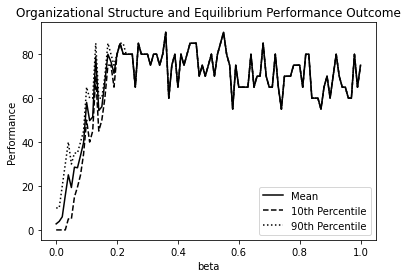

In [8]:
n = 280  # individual number
betas = np.arange(0, 1.01, 0.01)  # rewiring prob (decentralization)
m = 100  # decision dimension
s = 5  # complexity
lr = 0.3  # learning rate
subgroup_size = 7  # group size (z)
reality_change_rate = None # environment turbulence
loop = 100
change_freq = 0
# Basic model, without personnel turnover and environmental turbulence
# Show the impact of centralization
mean_list, ten_list, ninety_list = [], [], []
for beta in betas:
    reality = Reality(m=m, s=s)
    organization = Organization(n=n, beta=beta, subgroup_size=subgroup_size, m=m, s=s, reality=reality,
                                lr=lr, reality_change_rate=reality_change_rate)
    organization.form_network()
    organization.process(loop=loop, change_freq=change_freq)
    mean_list.append(organization.performance_average)
    ten_list.append(np.mean(np.percentile(organization.performance_list, 10)))
    ninety_list.append(np.mean(np.percentile(organization.performance_list, 90)))

x = betas
l1=plt.plot(x, mean_list, 'k-',label='Mean')
l2=plt.plot(x, ten_list, 'k--',label='10th Percentile')
l3=plt.plot(x, ninety_list, 'k:',label='90th Percentile')
plt.title('Organizational Structure and Equilibrium Performance Outcome')
plt.xlabel('beta')
plt.ylabel('Performance')
plt.legend()
# plt.savefig("beta.jpg")
plt.show()

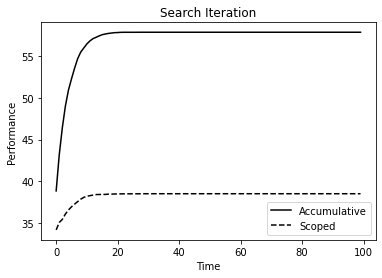

In [4]:
# The performance curve over iteration
# beta = 0; without environment turbulence
n = 280
beta = 0
m = 100
s = 1
lr = 0.3
subgroup_size = 7
reality_change_rate = 0
change_freq = None
loop = 100
reality = Reality(m=m, s=s)
organization = Organization(n=n, beta=beta, subgroup_size=subgroup_size, m=m, s=s, reality=reality,
                            lr=lr, reality_change_rate=reality_change_rate)
organization.form_network()
organization.process(loop=loop, change_freq=change_freq)
x = np.arange(loop)
plt.plot(x, organization.performance_curve, "k-", label='Accumulative')  # zero may learn from others
organization = Organization(n=n, beta=beta, subgroup_size=subgroup_size, m=m, s=s, reality=reality,
                            lr=lr, reality_change_rate=reality_change_rate)
organization.form_network()
organization.process_2(loop=loop, change_freq=change_freq)
plt.plot(x, organization.performance_curve, "k--", label='Scoped')  # zero will not learn from others
# plt.savefig("search.jpg")
plt.title('Search Iteration')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()